In [1]:
import pandas as pd
import numpy as np
import datetime, pytz

In [2]:
df = pd.read_csv('C:\\Users\\Kemal\\Desktop\\BitcoinDataset.csv')
print(df.head(7))
df['Date'] = pd.to_datetime(df['Date'])
df.Date = df.Date.dt.tz_localize('UTC')

df.info()

df.head(7)

   SNo     Name Symbol             Date        High         Low        Open  \
0    1  Bitcoin    BTC  4/29/2013 23:59  147.488007  134.000000  134.444000   
1    2  Bitcoin    BTC  4/30/2013 23:59  146.929993  134.050003  144.000000   
2    3  Bitcoin    BTC   5/1/2013 23:59  139.889999  107.720001  139.000000   
3    4  Bitcoin    BTC   5/2/2013 23:59  125.599998   92.281898  116.379997   
4    5  Bitcoin    BTC   5/3/2013 23:59  108.127998   79.099998  106.250000   
5    6  Bitcoin    BTC   5/4/2013 23:59  115.000000   92.500000   98.099998   
6    7  Bitcoin    BTC   5/5/2013 23:59  118.800003  107.142998  112.900002   

        Close  Volume     Marketcap  
0  144.539993     0.0  1.603769e+09  
1  139.000000     0.0  1.542813e+09  
2  116.989998     0.0  1.298955e+09  
3  105.209999     0.0  1.168517e+09  
4   97.750000     0.0  1.085995e+09  
5  112.500000     0.0  1.250317e+09  
6  115.910004     0.0  1.288693e+09  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries,

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:00+00:00,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:00+00:00,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:00+00:00,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:00+00:00,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:00+00:00,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09
5,6,Bitcoin,BTC,2013-05-04 23:59:00+00:00,115.000000,92.500000,98.099998,112.500000,0.0,1.250317e+09
6,7,Bitcoin,BTC,2013-05-05 23:59:00+00:00,118.800003,107.142998,112.900002,115.910004,0.0,1.288693e+09


In [3]:
# create valid date range
start = datetime.datetime(2013, 1, 1, 0, 0, 0, 0, pytz.UTC)
end = datetime.datetime(2021, 11, 11, 0, 0, 0, 0, pytz.UTC)


# find rows between start and end time and find the first row (00:00 monday morning)
weekly_rows = df[(df['Date'] >= start) & (df['Date'] <= end)].groupby([pd.Grouper(key='Date', freq='W-MON')]).first().reset_index()
weekly_rows.head()

,Date,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
0,2013-04-29 00:00:00+00:00,1,Bitcoin,BTC,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2013-05-06 00:00:00+00:00,2,Bitcoin,BTC,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,2013-05-13 00:00:00+00:00,9,Bitcoin,BTC,113.444000,97.699997,112.250000,111.500000,0.0,1.240594e+09
3,2013-05-20 00:00:00+00:00,16,Bitcoin,BTC,119.800003,110.250000,117.980003,111.500000,0.0,1.243874e+09
4,2013-05-27 00:00:00+00:00,23,Bitcoin,BTC,123.000000,121.209999,122.019997,122.879997,0.0,1.374013e+09


In [4]:
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import gc

import matplotlib.pyplot as plt
import seaborn as sns

trace1 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['Close'].astype(float),
    mode = 'lines',
    name = 'Close'
)

layout = dict(
    title='Historical Bitcoin Prices (2013-2021) with the Slider ',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                #change the count to desired amount of months.
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),

                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   SNo        2991 non-null   int64              
 1   Name       2991 non-null   object             
 2   Symbol     2991 non-null   object             
 3   Date       2991 non-null   datetime64[ns, UTC]
 4   High       2991 non-null   float64            
 5   Low        2991 non-null   float64            
 6   Open       2991 non-null   float64            
 7   Close      2991 non-null   float64            
 8   Volume     2991 non-null   float64            
 9   Marketcap  2991 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1), object(2)
memory usage: 233.8+ KB


In [6]:
print(df['Date'])

0      2013-04-29 23:59:00+00:00
1      2013-04-30 23:59:00+00:00
2      2013-05-01 23:59:00+00:00
3      2013-05-02 23:59:00+00:00
4      2013-05-03 23:59:00+00:00
                  ...           
2986   2021-07-02 23:59:00+00:00
2987   2021-07-03 23:59:00+00:00
2988   2021-07-04 23:59:00+00:00
2989   2021-07-05 23:59:00+00:00
2990   2021-07-06 23:59:00+00:00
Name: Date, Length: 2991, dtype: datetime64[ns, UTC]


In [7]:
df['Date'] = df['Date'].dt.tz_localize(None)
df = df.groupby([pd.Grouper(key='Date', freq='D')]).first().reset_index()
df = df.set_index('Date')
df = df[['Close']]
df['Close'].fillna(method='ffill', inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2991 entries, 2013-04-29 to 2021-07-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2991 non-null   float64
dtypes: float64(1)
memory usage: 46.7 KB


In [9]:
# split data
split_date1 = '01-Jan-2020'
split_date2 = '01-Jan-2018'
data_train1 = df.loc[df.index <= split_date2].copy()
data_train2 = df.loc[df.index >= split_date1].copy()
data_train = pd.concat([data_train1, data_train2])
data_test = df.loc[df.index > split_date2].copy()
data_test = data_test.loc[ data_test.index < split_date1].copy()

In [10]:
# Data preprocess
training_set = data_train.values
print(data_train)
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

                   Close
Date                    
2013-04-29    144.539993
2013-04-30    139.000000
2013-05-01    116.989998
2013-05-02    105.209999
2013-05-03     97.750000
...                  ...
2021-07-02  33897.048590
2021-07-03  34668.548400
2021-07-04  35287.779770
2021-07-05  33746.002460
2021-07-06  34235.193450

[2262 rows x 1 columns]


                   Close
Date                    
2018-01-02  14982.099610
2018-01-03  15201.000000
2018-01-04  15599.200200
2018-01-05  17429.500000
2018-01-06  17527.000000
...                  ...
2019-12-27   7290.088518
2019-12-28   7317.990034
2019-12-29   7422.652589
2019-12-30   7292.995078
2019-12-31   7193.598978

[729 rows x 1 columns]


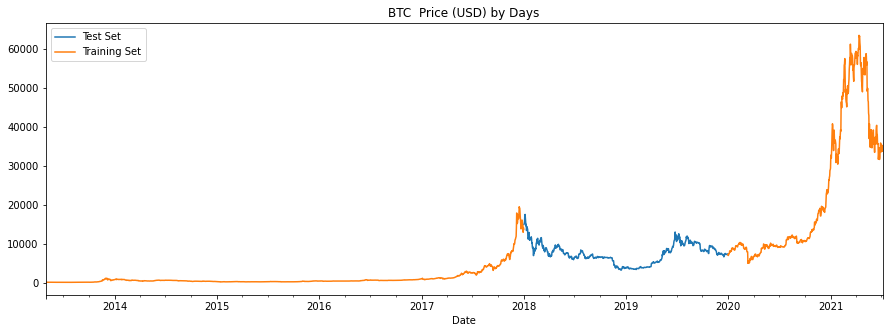

In [11]:
print(data_test)
_ = data_test \
    .rename(columns={'Close': 'Test Set'}) \
    .join(data_train.rename(columns={'Close': 'Training Set'}), how='outer') \
    .plot(figsize=(15,5), title='BTC  Price (USD) by Days', style='')

In [14]:
# Making the predictions
test_set = data_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))

# LSTM

MSE :  [288205.84457444504, 7359.117468848269, 44946.52597679154, 243721.9287462644, 162800.61654995824, 152566.78962088394, 163689.82335436222, 130073.69473357337, 9387.620402625455, 7110.021132208228]
MAE :  [288205.84457444504, 7359.117468848269, 44946.52597679154, 243721.9287462644, 162800.61654995824, 152566.78962088394, 163689.82335436222, 130073.69473357337, 9387.620402625455, 7110.021132208228]
MAPE :  [288205.84457444504, 7359.117468848269, 44946.52597679154, 243721.9287462644, 162800.61654995824, 152566.78962088394, 163689.82335436222, 130073.69473357337, 9387.620402625455, 7110.021132208228]
MAX :  [288205.84457444504, 7359.117468848269, 44946.52597679154, 243721.9287462644, 162800.61654995824, 152566.78962088394, 163689.82335436222, 130073.69473357337, 9387.620402625455, 7110.021132208228]
R2 :  [288205.84457444504, 7359.117468848269, 44946.52597679154, 243721.9287462644, 162800.61654995824, 152566.78962088394, 163689.82335436222, 130073.69473357337, 9387.620402625455, 7110

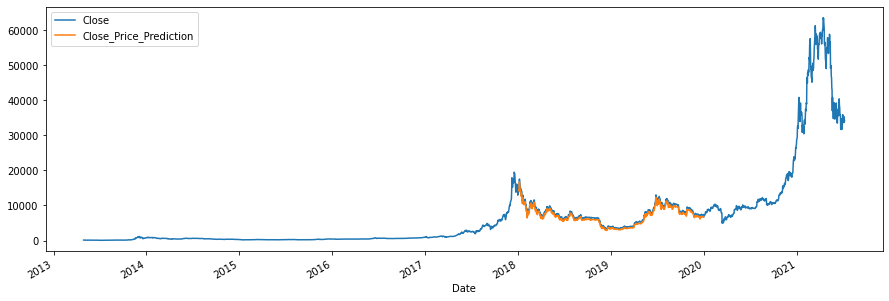

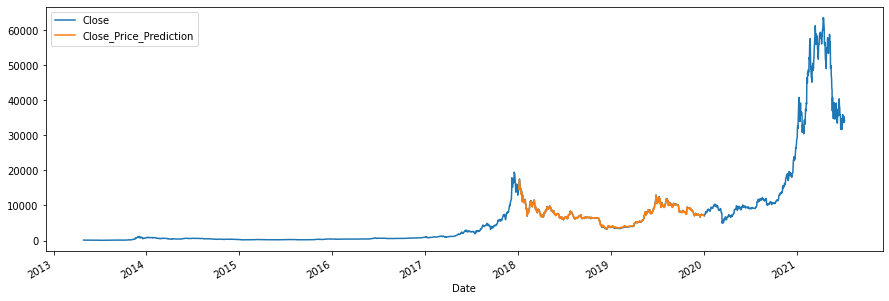

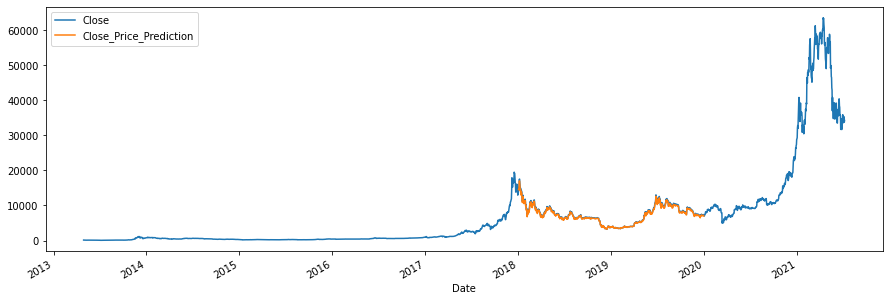

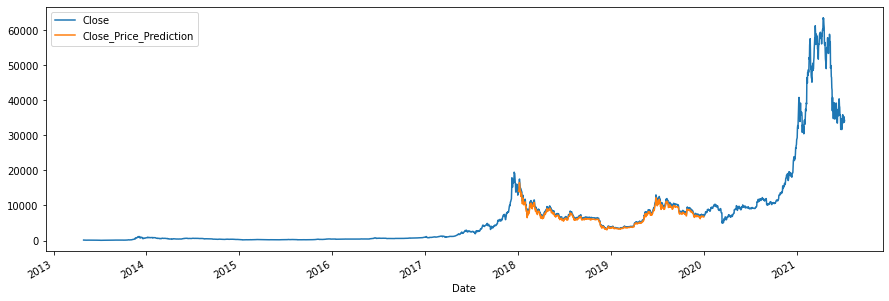

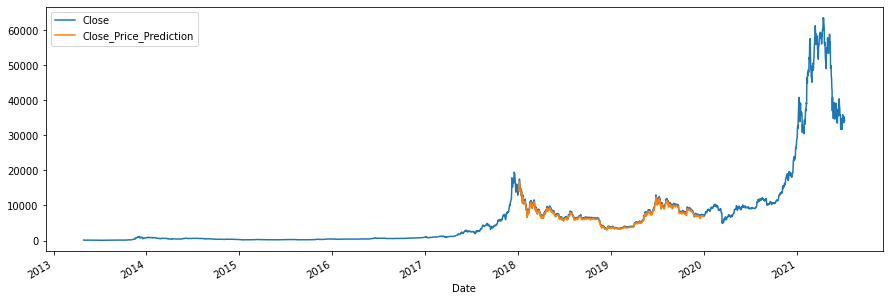

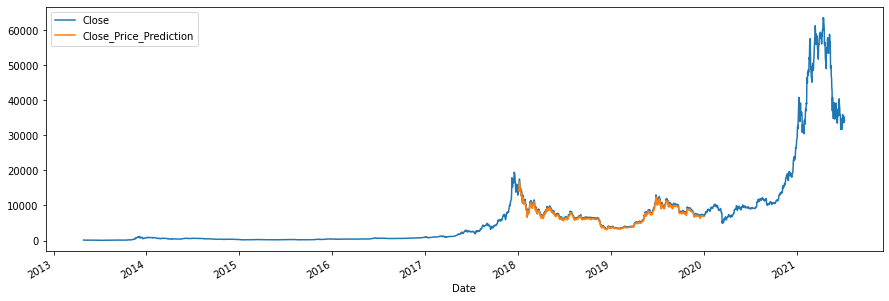

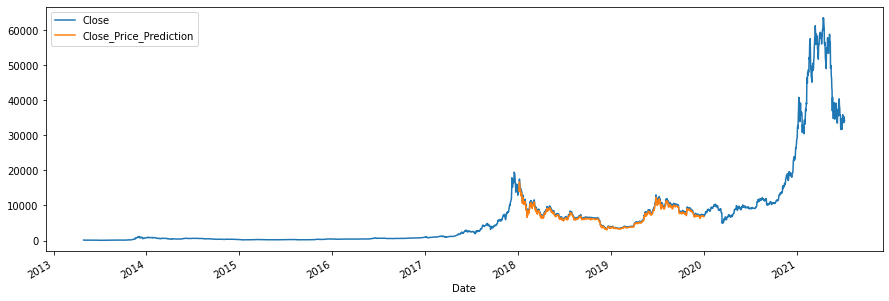

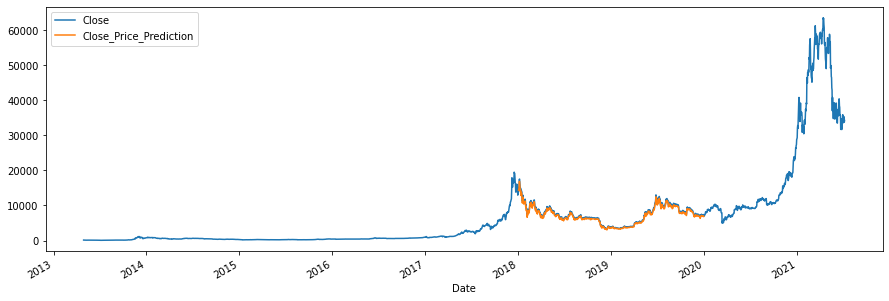

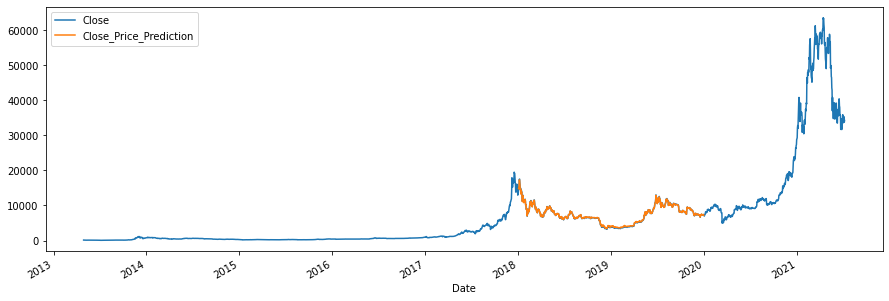

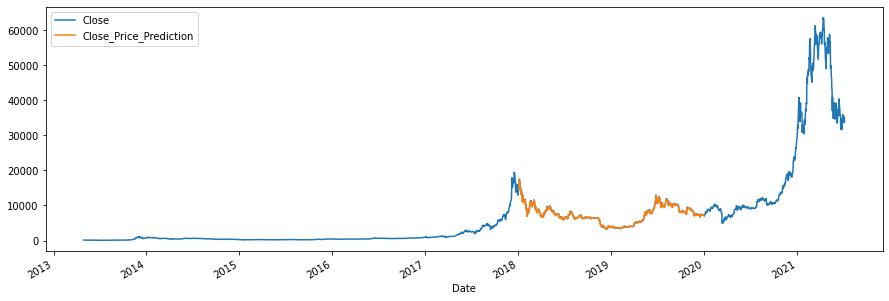

In [15]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, max_error, r2_score
mse_lstm = [0] * 10
mae_lstm = [0] * 10
mape_lstm = [0] * 10
max_lstm = [0] * 10
r2_lstm = [0] * 10

for i in range(10):

    model = Sequential()
    model.add(LSTM(128,activation="relu",input_shape=(1,1)))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=50, batch_size=50, verbose=0)
    
    predicted_BTC_price = model.predict(inputs)
    predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)
    data_test['Close_Price_Prediction'] = predicted_BTC_price
    data_all = pd.concat([data_test, data_train], sort=False)
    #saving the predicted values in a common data frame for future comparision
    final_data = data_all
    final_data = final_data.reset_index()
    final_data = final_data.rename(columns={'Close_Price_Prediction': 'lstm'})
    final_data = final_data[['Date','Close','lstm']]
    _ = data_all[['Close','Close_Price_Prediction']].plot(figsize=(15, 5))
    mse_lstm[i] = mean_squared_error(y_true=data_test['Close'],
                           y_pred=data_test['Close_Price_Prediction'])
    
    mae_lstm[i] = mean_absolute_error(y_true=data_test['Close'],
                           y_pred=data_test['Close_Price_Prediction'])
    mape_lstm[i] =mean_absolute_percentage_error(y_true=data_test['Close'],
                           y_pred=data_test['Close_Price_Prediction']);
    max_lstm[i] =max_error(y_true=data_test['Close'],
                           y_pred=data_test['Close_Price_Prediction']);
    r2_lstm[i] =r2_score(y_true=data_test['Close'],
                           y_pred=data_test['Close_Price_Prediction']);

print("MSE : ",mse_lstm);
print("MAE : ",mse_lstm);
print("MAPE : ",mse_lstm);
print("MAX : ",mse_lstm);
print("R2 : ",mse_lstm);


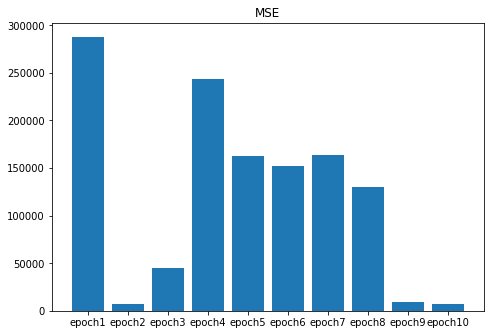

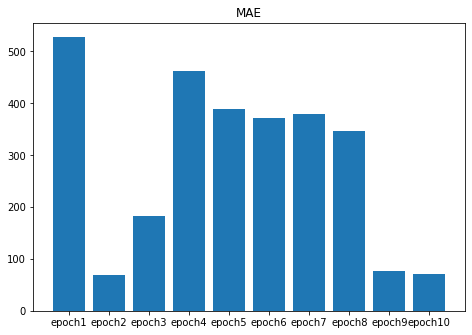

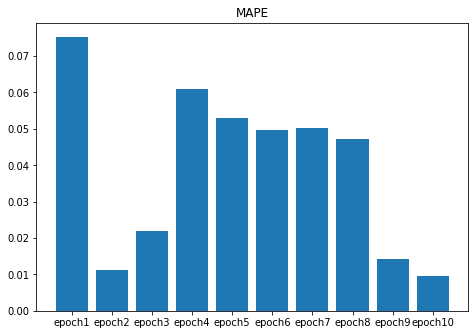

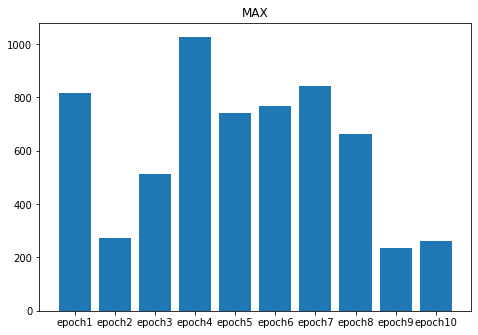

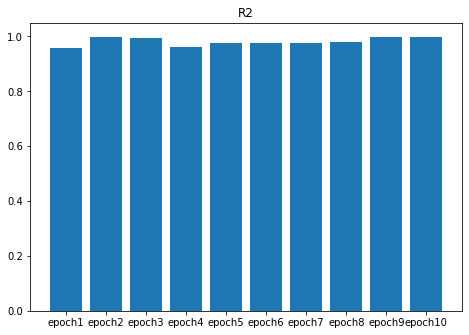

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
epoch = ['epoch1','epoch2','epoch3','epoch4','epoch5','epoch6','epoch7','epoch8','epoch9','epoch10',]
mses = [mse_lstm[0],mse_lstm[1],mse_lstm[2],mse_lstm[3],mse_lstm[4],mse_lstm[5],mse_lstm[6],mse_lstm[7],mse_lstm[8],mse_lstm[9]]
ax.bar(epoch,mses)
ax.set_title('MSE')
plt.show()

fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
maes = [mae_lstm[0],mae_lstm[1],mae_lstm[2],mae_lstm[3],mae_lstm[4],mae_lstm[5],mae_lstm[6],mae_lstm[7],mae_lstm[8],mae_lstm[9]]
ax2.bar(epoch,maes)
ax2.set_title('MAE')
plt.show()

fig3 = plt.figure()
ax3 = fig3.add_axes([0,0,1,1])
mapes = [mape_lstm[0],mape_lstm[1],mape_lstm[2],mape_lstm[3],mape_lstm[4],mape_lstm[5],mape_lstm[6],mape_lstm[7],mape_lstm[8],mape_lstm[9]]
ax3.bar(epoch,mapes)
ax3.set_title('MAPE')
plt.show()

fig4 = plt.figure()
ax4 = fig4.add_axes([0,0,1,1])
max = [max_lstm[0],max_lstm[1],max_lstm[2],max_lstm[3],max_lstm[4],max_lstm[5],max_lstm[6],max_lstm[7],max_lstm[8],max_lstm[9]]
ax4.bar(epoch,max)
ax4.set_title('MAX')
plt.show()

fig5 = plt.figure()
ax5 = fig5.add_axes([0,0,1,1])
r2 = [r2_lstm[0],r2_lstm[1],r2_lstm[2],r2_lstm[3],r2_lstm[4],r2_lstm[5],r2_lstm[6],r2_lstm[7],r2_lstm[8],r2_lstm[9]]
ax5.bar(epoch,r2)
ax5.set_title('R2')
plt.show()

In [ ]:
model.summary()

# XGBOOST


In [23]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [24]:
X_train, y_train = create_features(data_train, label='Close')
X_test, y_test = create_features(data_test, label='Close')

<ipython-input-23-568ff9107aea>:13: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [26]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

mse_xg = [0] * 10
mae_xg = [0] * 10
mape_xg = [0] * 10
max_xg = [0] * 10
r2_xg = [0] * 10

for i in range(10):
    model =  xgb.XGBRegressor(objective ='reg:linear',min_child_weight=10, booster='gbtree', colsample_bytree = 0.3, learning_rate = 0.1,
                    max_depth = 3, alpha = 20, n_estimators = 500)
    model.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            early_stopping_rounds=100,
           verbose=True) # Change verbose to True if you want to see it train
    data_test['Close_Price_Prediction'] = model.predict(X_test)
    data_all = pd.concat([data_test, data_train], sort=False)
    mse_xg[i] = mean_squared_error(y_true=data_test['Close'],
                           y_pred=data_test['Close_Price_Prediction'])
    
    mae_xg[i] = mean_absolute_error(y_true=data_test['Close'],
                           y_pred=data_test['Close_Price_Prediction'])
    mape_xg[i] =mean_absolute_percentage_error(y_true=data_test['Close'],
                           y_pred=data_test['Close_Price_Prediction']);
    max_xg[i] =max_error(y_true=data_test['Close'],
                           y_pred=data_test['Close_Price_Prediction']);
    r2_xg[i] =r2_score(y_true=data_test['Close'],
                           y_pred=data_test['Close_Price_Prediction']);

print("MSE : ",mse_xg);
print("MAE : ",mae_xg);
print("MAPE : ",mape_xg);
print("MAX : ",max_xg);
print("R2 : ",r2_xg);

[22:54:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:14093.84570	validation_1-rmse:7318.42969
[1]	validation_0-rmse:13816.25684	validation_1-rmse:6820.99219
[2]	validation_0-rmse:13580.00098	validation_1-rmse:6400.74951
[3]	validation_0-rmse:12299.07617	validation_1-rmse:5622.23047
[4]	validation_0-rmse:12158.55957	validation_1-rmse:5263.13086
[5]	validation_0-rmse:12014.01465	validation_1-rmse:5006.54492
[6]	validation_0-rmse:11898.32910	validation_1-rmse:4791.64209
[7]	validation_0-rmse:10793.39844	validation_1-rmse:4233.62305
[8]	validation_0-rmse:10703.85449	validation_1-rmse:4104.84033
[9]	validation_0-rmse:9744.25000	validation_1-rmse:3669.64575
[10]	validation_0-rmse:8845.63477	validation_1-rmse:3491.79102
[11]	validation_0-rmse:8799.41602	validation_1-rmse:3409.41821
[12]	validation_0-rmse:8037.01855	validation_1-rmse:3241.29492
[13]	

[12]	validation_0-rmse:8037.01855	validation_1-rmse:3241.29492
[13]	validation_0-rmse:7993.02930	validation_1-rmse:3238.26416
[14]	validation_0-rmse:7957.79834	validation_1-rmse:3249.33252
[15]	validation_0-rmse:7928.63770	validation_1-rmse:3263.90771
[16]	validation_0-rmse:7905.14551	validation_1-rmse:3288.03857
[17]	validation_0-rmse:7887.00049	validation_1-rmse:3309.76733
[18]	validation_0-rmse:7871.22510	validation_1-rmse:3337.38184
[19]	validation_0-rmse:7855.47314	validation_1-rmse:3360.06055
[20]	validation_0-rmse:7842.26465	validation_1-rmse:3383.71924
[21]	validation_0-rmse:7142.43603	validation_1-rmse:3397.71680
[22]	validation_0-rmse:6500.12842	validation_1-rmse:3466.57519
[23]	validation_0-rmse:5994.16699	validation_1-rmse:3534.29883
[24]	validation_0-rmse:5988.77588	validation_1-rmse:3560.66455
[25]	validation_0-rmse:5545.11621	validation_1-rmse:3642.83594
[26]	validation_0-rmse:5540.56738	validation_1-rmse:3671.28223
[27]	validation_0-rmse:5535.50830	validation_1-rmse:369

[27]	validation_0-rmse:5535.50830	validation_1-rmse:3698.33325
[28]	validation_0-rmse:5532.38965	validation_1-rmse:3722.41455
[29]	validation_0-rmse:5530.06689	validation_1-rmse:3743.46851
[30]	validation_0-rmse:5528.02002	validation_1-rmse:3763.02930
[31]	validation_0-rmse:5526.50488	validation_1-rmse:3776.58740
[32]	validation_0-rmse:5525.27393	validation_1-rmse:3790.66968
[33]	validation_0-rmse:5524.27734	validation_1-rmse:3801.98144
[34]	validation_0-rmse:5523.11328	validation_1-rmse:3814.54370
[35]	validation_0-rmse:5522.12744	validation_1-rmse:3825.77856
[36]	validation_0-rmse:5521.73389	validation_1-rmse:3831.84985
[37]	validation_0-rmse:5521.08643	validation_1-rmse:3837.49292
[38]	validation_0-rmse:5520.42676	validation_1-rmse:3844.57886
[39]	validation_0-rmse:5520.03369	validation_1-rmse:3852.75244
[40]	validation_0-rmse:5519.03906	validation_1-rmse:3860.78980
[41]	validation_0-rmse:5518.61182	validation_1-rmse:3869.65454
[42]	validation_0-rmse:5129.15283	validation_1-rmse:395

[42]	validation_0-rmse:5129.15283	validation_1-rmse:3957.34399
[43]	validation_0-rmse:5129.05176	validation_1-rmse:3960.66943
[44]	validation_0-rmse:5128.28223	validation_1-rmse:3967.72266
[45]	validation_0-rmse:4786.73340	validation_1-rmse:4053.22852
[46]	validation_0-rmse:4784.16895	validation_1-rmse:4058.60571
[47]	validation_0-rmse:4782.45557	validation_1-rmse:4064.27100
[48]	validation_0-rmse:4781.26660	validation_1-rmse:4071.13574
[49]	validation_0-rmse:4406.09814	validation_1-rmse:4132.80371
[50]	validation_0-rmse:4404.29395	validation_1-rmse:4140.50537
[51]	validation_0-rmse:4403.21582	validation_1-rmse:4147.25147
[52]	validation_0-rmse:4402.64600	validation_1-rmse:4148.87939
[53]	validation_0-rmse:4402.03906	validation_1-rmse:4153.05469
[54]	validation_0-rmse:4401.28418	validation_1-rmse:4158.91260
[55]	validation_0-rmse:4400.33838	validation_1-rmse:4161.96045
[56]	validation_0-rmse:4399.95996	validation_1-rmse:4163.88818
[57]	validation_0-rmse:4399.25244	validation_1-rmse:416

[57]	validation_0-rmse:4399.25244	validation_1-rmse:4166.53467
[58]	validation_0-rmse:4398.85889	validation_1-rmse:4168.63281
[59]	validation_0-rmse:4398.36963	validation_1-rmse:4170.03125
[60]	validation_0-rmse:4397.93897	validation_1-rmse:4174.47852
[61]	validation_0-rmse:4397.30078	validation_1-rmse:4175.51514
[62]	validation_0-rmse:4397.14795	validation_1-rmse:4176.45557
[63]	validation_0-rmse:4397.14307	validation_1-rmse:4176.93848
[64]	validation_0-rmse:4397.01904	validation_1-rmse:4177.75098
[65]	validation_0-rmse:4125.62939	validation_1-rmse:4255.47656
[66]	validation_0-rmse:3893.67895	validation_1-rmse:4327.72900
[67]	validation_0-rmse:3893.59009	validation_1-rmse:4328.34668
[68]	validation_0-rmse:3893.51733	validation_1-rmse:4328.90918
[69]	validation_0-rmse:3891.85669	validation_1-rmse:4332.72070
[70]	validation_0-rmse:3621.39160	validation_1-rmse:4367.44727
[71]	validation_0-rmse:3620.17529	validation_1-rmse:4371.27246
[72]	validation_0-rmse:3619.18799	validation_1-rmse:437

[71]	validation_0-rmse:3620.17529	validation_1-rmse:4371.27246
[72]	validation_0-rmse:3619.18799	validation_1-rmse:4374.80518
[73]	validation_0-rmse:3618.05884	validation_1-rmse:4379.56934
[74]	validation_0-rmse:3618.05469	validation_1-rmse:4379.81641
[75]	validation_0-rmse:3618.05078	validation_1-rmse:4380.03760
[76]	validation_0-rmse:3617.37817	validation_1-rmse:4382.68018
[77]	validation_0-rmse:3616.72266	validation_1-rmse:4385.41895
[78]	validation_0-rmse:3438.25806	validation_1-rmse:4450.35449
[79]	validation_0-rmse:3438.25415	validation_1-rmse:4450.52344
[80]	validation_0-rmse:3437.07471	validation_1-rmse:4456.28857
[81]	validation_0-rmse:3437.07275	validation_1-rmse:4456.42627
[82]	validation_0-rmse:3436.78882	validation_1-rmse:4457.11230
[83]	validation_0-rmse:3435.88428	validation_1-rmse:4460.00000
[84]	validation_0-rmse:3434.89697	validation_1-rmse:4463.11621
[85]	validation_0-rmse:3280.98731	validation_1-rmse:4522.91895
[86]	validation_0-rmse:3150.67798	validation_1-rmse:457

[85]	validation_0-rmse:3280.98731	validation_1-rmse:4522.91895
[86]	validation_0-rmse:3150.67798	validation_1-rmse:4577.81250
[87]	validation_0-rmse:2939.64429	validation_1-rmse:4612.92041
[88]	validation_0-rmse:2937.19775	validation_1-rmse:4619.89893
[89]	validation_0-rmse:2934.28662	validation_1-rmse:4625.80566
[90]	validation_0-rmse:2932.79663	validation_1-rmse:4631.32812
[91]	validation_0-rmse:2931.70337	validation_1-rmse:4636.55957
[92]	validation_0-rmse:2930.57959	validation_1-rmse:4641.79443
[93]	validation_0-rmse:2930.51416	validation_1-rmse:4642.03809
[94]	validation_0-rmse:2930.09131	validation_1-rmse:4642.59912
[95]	validation_0-rmse:2929.03662	validation_1-rmse:4647.07080
[96]	validation_0-rmse:2829.11426	validation_1-rmse:4694.84570
[97]	validation_0-rmse:2827.91675	validation_1-rmse:4699.55957
[98]	validation_0-rmse:2743.64404	validation_1-rmse:4743.17627
[99]	validation_0-rmse:2741.78931	validation_1-rmse:4749.41406
[100]	validation_0-rmse:2670.86499	validation_1-rmse:47

[99]	validation_0-rmse:2741.78931	validation_1-rmse:4749.41406
[100]	validation_0-rmse:2670.86499	validation_1-rmse:4789.12793
[101]	validation_0-rmse:2668.69092	validation_1-rmse:4795.43262
[102]	validation_0-rmse:2667.12305	validation_1-rmse:4800.97461
[103]	validation_0-rmse:2665.37793	validation_1-rmse:4805.43652
[104]	validation_0-rmse:2664.24341	validation_1-rmse:4810.50049
[105]	validation_0-rmse:2663.07837	validation_1-rmse:4815.24170
[106]	validation_0-rmse:2661.56787	validation_1-rmse:4818.68262
[107]	validation_0-rmse:2572.84131	validation_1-rmse:4871.29346
[108]	validation_0-rmse:2498.54492	validation_1-rmse:4922.37158
[109]	validation_0-rmse:2497.68042	validation_1-rmse:4925.31982
[110]	validation_0-rmse:2497.22974	validation_1-rmse:4927.88672
[111]	validation_0-rmse:2497.14941	validation_1-rmse:4928.11865
[112]	validation_0-rmse:2496.07715	validation_1-rmse:4930.48633
[22:54:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression

[113]	validation_0-rmse:2495.88037	validation_1-rmse:4933.30615
[22:54:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:14093.84570	validation_1-rmse:7318.42969
[1]	validation_0-rmse:13816.25684	validation_1-rmse:6820.99219
[2]	validation_0-rmse:13580.00098	validation_1-rmse:6400.74951
[3]	validation_0-rmse:12299.07617	validation_1-rmse:5622.23047
[4]	validation_0-rmse:12158.55957	validation_1-rmse:5263.13086
[5]	validation_0-rmse:12014.01465	validation_1-rmse:5006.54492
[6]	validation_0-rmse:11898.32910	validation_1-rmse:4791.64209
[7]	validation_0-rmse:10793.39844	validation_1-rmse:4233.62305
[8]	validation_0-rmse:10703.85449	validation_1-rmse:4104.84033
[9]	validation_0-rmse:9744.25000	validation_1-rmse:3669.64575
[10]	validation_0-rmse:8845.63477	validation_1-rmse:3491.79102
[11]	validation_0-rmse:8799.41602	validation_1-rmse:3409.41821
[12]

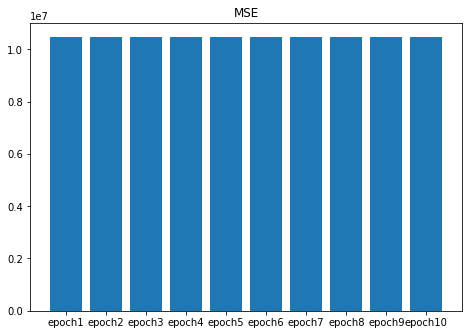

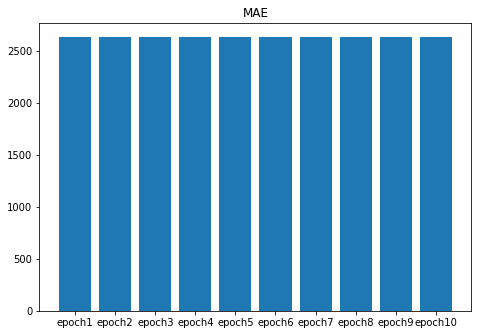

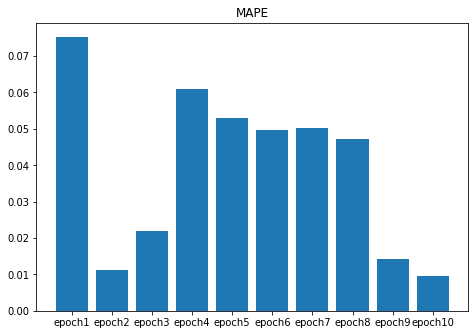

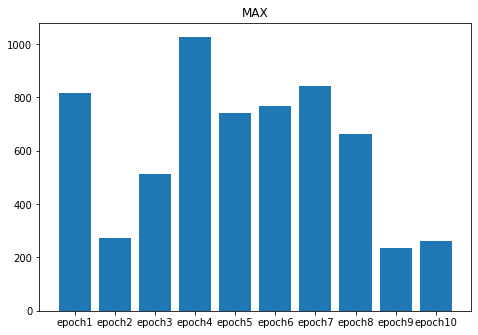

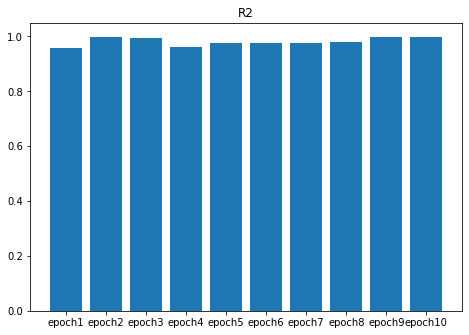

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
epoch = ['epoch1','epoch2','epoch3','epoch4','epoch5','epoch6','epoch7','epoch8','epoch9','epoch10',]
mses = [mse_xg[0],mse_xg[1],mse_xg[2],mse_xg[3],mse_xg[4],mse_xg[5],mse_xg[6],mse_xg[7],mse_xg[8],mse_xg[9]]
ax.bar(epoch,mses)
ax.set_title('MSE')
plt.show()

fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
maes = [mae_xg[0],mae_xg[1],mae_xg[2],mae_xg[3],mae_xg[4],mae_xg[5],mae_xg[6],mae_xg[7],mae_xg[8],mae_xg[9]]
ax2.bar(epoch,maes)
ax2.set_title('MAE')
plt.show()

fig3 = plt.figure()
ax3 = fig3.add_axes([0,0,1,1])
mapes = [mape_lstm[0],mape_lstm[1],mape_lstm[2],mape_lstm[3],mape_lstm[4],mape_lstm[5],mape_lstm[6],mape_lstm[7],mape_lstm[8],mape_lstm[9]]
ax3.bar(epoch,mapes)
ax3.set_title('MAPE')
plt.show()

fig4 = plt.figure()
ax4 = fig4.add_axes([0,0,1,1])
max = [max_lstm[0],max_lstm[1],max_lstm[2],max_lstm[3],max_lstm[4],max_lstm[5],max_lstm[6],max_lstm[7],max_lstm[8],max_lstm[9]]
ax4.bar(epoch,max)
ax4.set_title('MAX')
plt.show()

fig5 = plt.figure()
ax5 = fig5.add_axes([0,0,1,1])
r2 = [r2_lstm[0],r2_lstm[1],r2_lstm[2],r2_lstm[3],r2_lstm[4],r2_lstm[5],r2_lstm[6],r2_lstm[7],r2_lstm[8],r2_lstm[9]]
ax5.bar(epoch,r2)
ax5.set_title('R2')
plt.show()

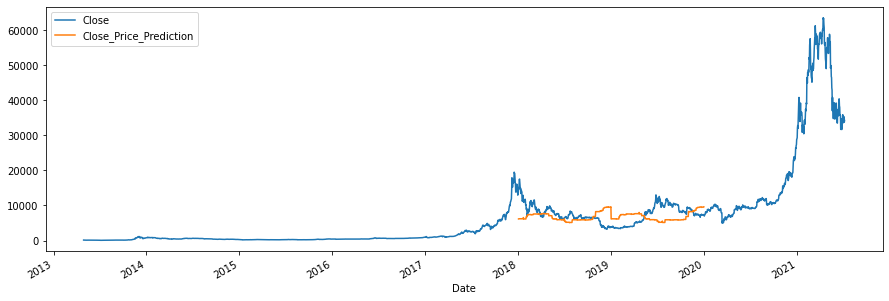

In [28]:
_ = data_all[['Close','Close_Price_Prediction']].plot(figsize=(15, 5))

In [29]:
mean_absolute_error(y_true=data_test['Close'],
                   y_pred=data_test['Close_Price_Prediction'])

2638.0079242128772

# ARIMA

In [30]:
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product

In [31]:
df = pd.read_csv('C:\\Users\\Kemal\\Desktop\\BitcoinDataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.Date = df.Date.dt.tz_localize('UTC')

df.info()

df.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   SNo        2991 non-null   int64              
 1   Name       2991 non-null   object             
 2   Symbol     2991 non-null   object             
 3   Date       2991 non-null   datetime64[ns, UTC]
 4   High       2991 non-null   float64            
 5   Low        2991 non-null   float64            
 6   Open       2991 non-null   float64            
 7   Close      2991 non-null   float64            
 8   Volume     2991 non-null   float64            
 9   Marketcap  2991 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1), object(2)
memory usage: 233.8+ KB


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:00+00:00,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:00+00:00,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:00+00:00,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:00+00:00,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:00+00:00,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09
5,6,Bitcoin,BTC,2013-05-04 23:59:00+00:00,115.000000,92.500000,98.099998,112.500000,0.0,1.250317e+09
6,7,Bitcoin,BTC,2013-05-05 23:59:00+00:00,118.800003,107.142998,112.900002,115.910004,0.0,1.288693e+09


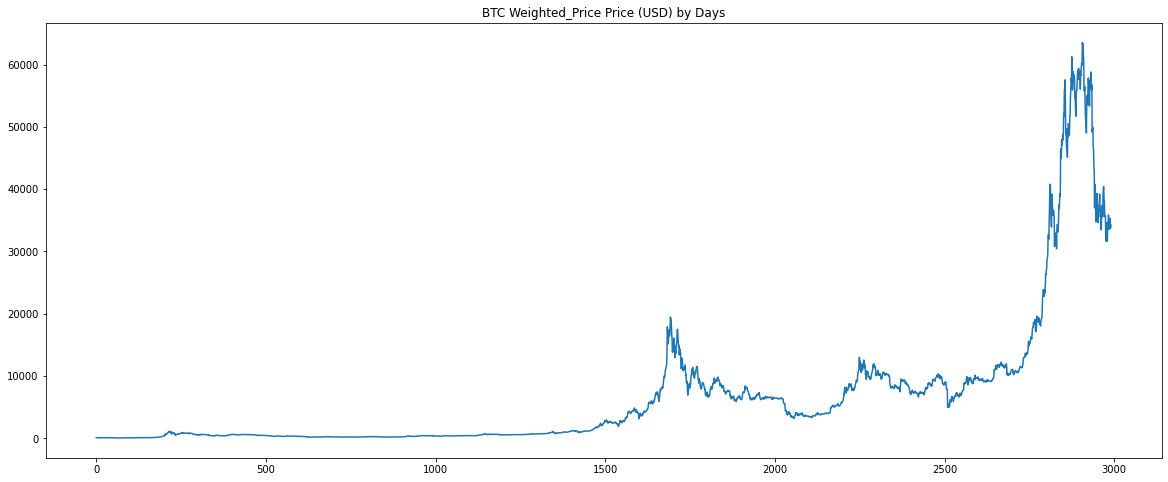

In [32]:
plt.figure(figsize=[20,8])
plt.title('BTC Weighted_Price Price (USD) by Days')
plt.plot(df.Close, '-', label='By Days')

In [33]:
df['Date'] = df['Date'].dt.tz_localize(None)
df = df.groupby([pd.Grouper(key='Date', freq='M')]).first().reset_index()
df = df.set_index('Date')
df = df[['Close']]
df['Close'].fillna(method='ffill', inplace=True)

In [34]:
# split data
split_date1 = '01-Jan-2020'
split_date2 = '01-Jan-2019'
data_train1 = df.loc[df.index <= split_date2].copy()
data_train2 = df.loc[df.index >= split_date1].copy()
data_train = pd.concat([data_train1, data_train2])
data_test = df.loc[df.index > split_date2].copy()
data_test = data_test.loc[ data_test.index < split_date1].copy()

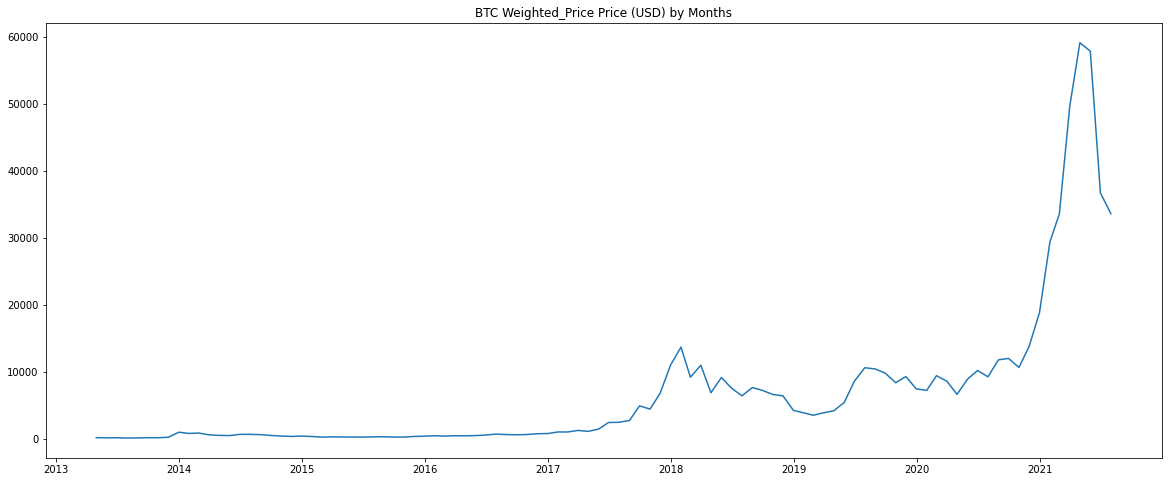

In [35]:
plt.figure(figsize=[20,8])
plt.title('BTC Weighted_Price Price (USD) by Months')
plt.plot(df.Close, '-', label='By Months')

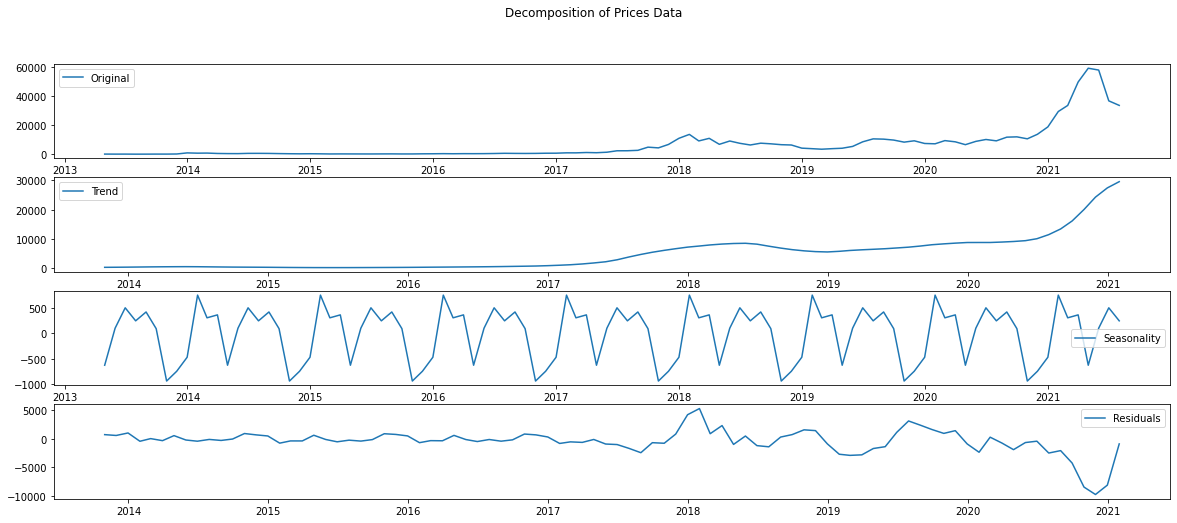

In [36]:
decomposition = sm.tsa.seasonal_decompose(df.Close)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = plt.figure(figsize=(20,8))

plt.subplot(411)
plt.plot(df.Close, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

fig.suptitle('Decomposition of Prices Data')
plt.show()

In [37]:
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df.Close)[1])

Dickey–Fuller test: p=0.994393


In [46]:
for i in range(10):
    # Initial approximation of parameters
    Qs = range(0, 2)
    qs = range(0, 3)
    Ps = range(0, 3)
    ps = range(0, 3)
    D=1
    d=1
    parameters = product(ps, qs, Ps, Qs)
    parameters_list = list(parameters)
    len(parameters_list)

    # Model Selection
    results = []
    best_aic = float("inf")
    warnings.filterwarnings('ignore')
    for param in parameters_list:
        try:
            model=sm.tsa.statespace.SARIMAX(df.Close, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], 12),enforce_stationarity=False,
                                                enforce_invertibility=False).fit(disp=-1)
        except ValueError:
            #print('wrong parameters:', param)
            continue
        aic = model.aic
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
    # Best Models
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    print(result_table.sort_values(by = 'aic', ascending=True).head())
    print(best_model.summary())
    df_month2 = df[['Close']]
    future = pd.DataFrame()
    df_month2 = pd.concat([df_month2, future])
    df_month2['forecast'] = best_model.predict(start=0, end=200)

    print("MSE : ",mean_squared_error(y_true=df[['Close']],
                       y_pred=df_month2['forecast']));
    print("MAE : ",mean_absolute_error(y_true=df[['Close']],
                       y_pred=df_month2['forecast']));
    print("MAPE : ",mean_absolute_percentage_error(y_true=df[['Close']],
                       y_pred=df_month2['forecast']));
    print("Max error : ",max_error(y_true=df[['Close']],
                       y_pred=df_month2['forecast']));
    print("R2 Score : ",r2_score(y_true=df[['Close']],
                       y_pred=df_month2['forecast']));

      parameters          aic
40  (2, 0, 2, 0)  1182.652671
46  (2, 1, 2, 0)  1183.884026
41  (2, 0, 2, 1)  1184.427209
47  (2, 1, 2, 1)  1185.876107
52  (2, 2, 2, 0)  1187.107745
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  100
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -586.326
Date:                            Thu, 12 Aug 2021   AIC                           1182.653
Time:                                    23:03:29   BIC                           1193.207
Sample:                                04-30-2013   HQIC                          1186.789
                                     - 07-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------

      parameters          aic
40  (2, 0, 2, 0)  1182.652671
46  (2, 1, 2, 0)  1183.884026
41  (2, 0, 2, 1)  1184.427209
47  (2, 1, 2, 1)  1185.876107
52  (2, 2, 2, 0)  1187.107745
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  100
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -586.326
Date:                            Thu, 12 Aug 2021   AIC                           1182.653
Time:                                    23:04:33   BIC                           1193.207
Sample:                                04-30-2013   HQIC                          1186.789
                                     - 07-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------

      parameters          aic
40  (2, 0, 2, 0)  1182.652671
46  (2, 1, 2, 0)  1183.884026
41  (2, 0, 2, 1)  1184.427209
47  (2, 1, 2, 1)  1185.876107
52  (2, 2, 2, 0)  1187.107745
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  100
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -586.326
Date:                            Thu, 12 Aug 2021   AIC                           1182.653
Time:                                    23:05:35   BIC                           1193.207
Sample:                                04-30-2013   HQIC                          1186.789
                                     - 07-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------

      parameters          aic
40  (2, 0, 2, 0)  1182.652671
46  (2, 1, 2, 0)  1183.884026
41  (2, 0, 2, 1)  1184.427209
47  (2, 1, 2, 1)  1185.876107
52  (2, 2, 2, 0)  1187.107745
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  100
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -586.326
Date:                            Thu, 12 Aug 2021   AIC                           1182.653
Time:                                    23:01:54   BIC                           1193.207
Sample:                                04-30-2013   HQIC                          1186.789
                                     - 07-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------

In [45]:
df_month2 = df[['Close']]
future = pd.DataFrame()
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = best_model.predict(start=0, end=200)

print("MSE : ",mean_squared_error(y_true=df[['Close']],
                       y_pred=df_month2['forecast']));
print("MAE : ",mean_absolute_error(y_true=df[['Close']],
                       y_pred=df_month2['forecast']));
print("MAPE : ",mean_absolute_percentage_error(y_true=df[['Close']],
                       y_pred=df_month2['forecast']));
print("Max error : ",max_error(y_true=df[['Close']],
                       y_pred=df_month2['forecast']));
print("R2 Score : ",r2_score(y_true=df[['Close']],
                       y_pred=df_month2['forecast']));

MSE :  7950945.368216312
MAE :  1463.4171594609902
MAPE :  0.2899441675798125
Max error :  11539.584205465391
R2 Score :  0.9366307170321426


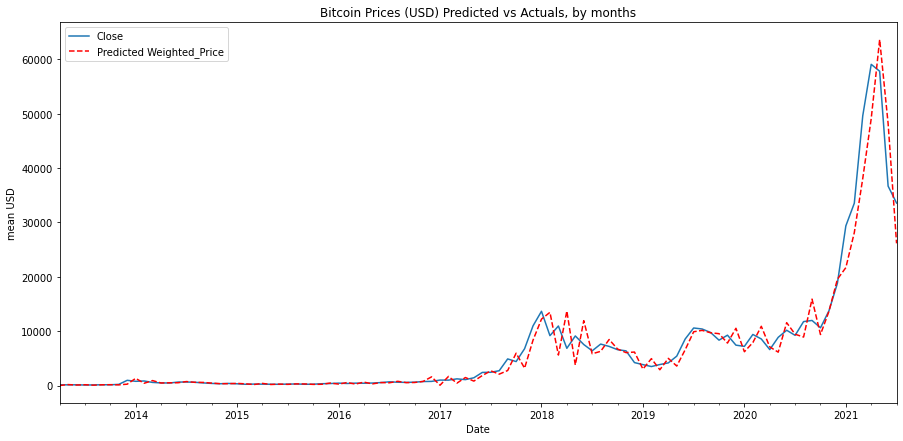

In [50]:
plt.figure(figsize=(15,7))
df_month2.Close.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin Prices (USD) Predicted vs Actuals, by months')
plt.ylabel('mean USD')
plt.show()

# LINEAR REGRESSION



In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [52]:
df = pd.read_csv('C:\\Users\\Kemal\\Desktop\\BitcoinDataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')

df.info()

df.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   float64
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 233.8+ KB


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,0.0,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,1.0,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2.0,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,3.0,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,4.0,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09
5,6,Bitcoin,BTC,5.0,115.000000,92.500000,98.099998,112.500000,0.0,1.250317e+09
6,7,Bitcoin,BTC,6.0,118.800003,107.142998,112.900002,115.910004,0.0,1.288693e+09


In [53]:
required_features = ['Date', 'Close']
output_label = 'Close'

In [54]:
x_train, x_test, y_train, y_test = train_test_split(
df[required_features],
df[output_label],
test_size = 0.2
)
print(x_train)

        Date         Close
1912  1912.0   8424.269531
2253  2253.0  10817.155600
1056  1056.0    413.755005
158    158.0    129.009995
45      45.0    104.000000
...      ...           ...
1199  1199.0    592.103027
1689  1689.0  16408.199220
526    526.0    336.187012
2582  2582.0   8790.368001
2414  2414.0   7564.345403

[2392 rows x 2 columns]


In [55]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [56]:
model.score(x_test, y_test)

1.0

In [57]:
future_set = df.shift(periods=30).tail(30)

In [58]:
df['Close_Price_Prediction'] = model.predict(df[required_features])
#prediction = model.predict(future_set[required_features])
print(df['Close_Price_Prediction'])


0         144.539993
1         139.000000
2         116.989998
3         105.209999
4          97.750000
            ...     
2986    33897.048590
2987    34668.548400
2988    35287.779770
2989    33746.002460
2990    34235.193450
Name: Close_Price_Prediction, Length: 2991, dtype: float64


In [59]:
mse_lr = [0] * 10
mae_lr = [0] * 10
mape_lr = [0] * 10
max_lr = [0] * 10
r2_lr = [0] * 10




for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(
    df[required_features],
    df[output_label],
    test_size = 0.2
    )
    model = LinearRegression()
    model.fit(x_train, y_train)
    model.score(x_test, y_test)
    df['Close_Price_Prediction'] = model.predict(df[required_features])
    #prediction = model.predict(future_set[required_features])
    #print(df['Close_Price_Prediction'])
    mse_lr[i] =  mean_squared_error(y_true=df['Close'],
                       y_pred=df['Close_Price_Prediction']);
    mae_lr[i] = mean_absolute_error(y_true=df['Close'],
                       y_pred=df['Close_Price_Prediction']);
    mape_lr[i] = mean_absolute_percentage_error(y_true=df['Close'],
                       y_pred=df['Close_Price_Prediction']);
    max_lr[i] = max_error(y_true=df['Close'],
                       y_pred=df['Close_Price_Prediction']);
    r2_lr[i] = r2_score(y_true=df['Close'],
                       y_pred=df['Close_Price_Prediction']);
print("MSE : ",mse_lr);
print("MAE : ",mae_lr);
print("MAPE : ",mape_lr);
print("MAX : ",max_lr);
print("R2 : ",r2_lr);

MSE :  [4.3059253920656826e-23, 8.92703676378296e-24, 2.3399443757951822e-23, 1.0261382168018615e-23, 2.4953500099930238e-23, 1.4752475748690338e-22, 3.057840714062056e-23, 4.013740017618495e-24, 2.7249919067525754e-23, 3.2216495214428997e-23]
MAE :  [4.031806205066669e-12, 2.202060072976775e-12, 3.957858447531596e-12, 2.0166252857218034e-12, 3.2260160589168484e-12, 6.446910318641792e-12, 3.023096836572628e-12, 1.1036479505465875e-12, 2.837310460133797e-12, 4.139606299561225e-12]
MAPE :  [4.002863295238333e-15, 2.506792237353411e-15, 7.262937501663656e-15, 3.4568116084380155e-15, 5.125945688564323e-15, 5.02115290754203e-15, 4.085350935987224e-15, 1.1552395135617142e-15, 2.038451533343157e-15, 5.379916026564693e-15]
MAX :  [3.637978807091713e-11, 1.4551915228366852e-11, 1.4551915228366852e-11, 1.4551915228366852e-11, 2.9103830456733704e-11, 7.275957614183426e-11, 2.9103830456733704e-11, 7.275957614183426e-12, 2.9103830456733704e-11, 2.9103830456733704e-11]
R2 :  [1.0, 1.0, 1.0, 1.0, 1.0

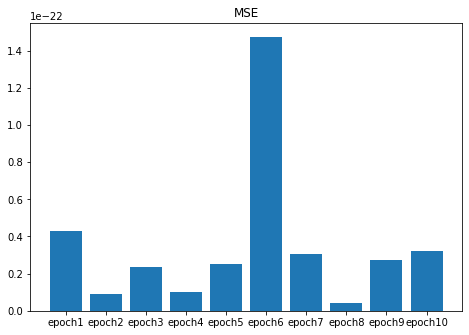

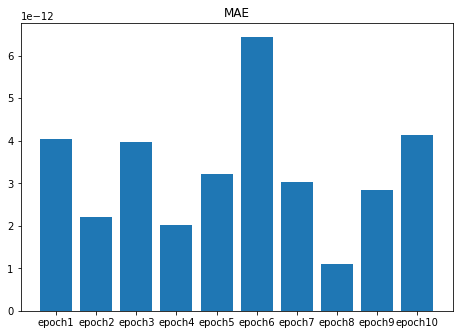

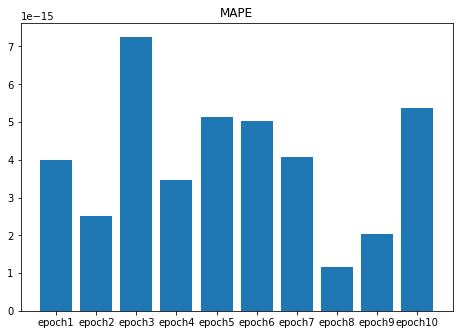

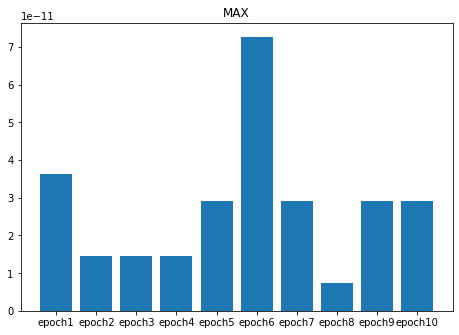

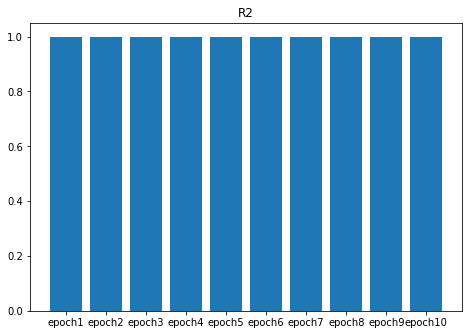

In [60]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
epoch = ['epoch1','epoch2','epoch3','epoch4','epoch5','epoch6','epoch7','epoch8','epoch9','epoch10',]
mses = [mse_lr[0],mse_lr[1],mse_lr[2],mse_lr[3],mse_lr[4],mse_lr[5],mse_lr[6],mse_lr[7],mse_lr[8],mse_lr[9]]
ax.bar(epoch,mses)
ax.set_title('MSE')
plt.show()

fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
maes = [mae_lr[0],mae_lr[1],mae_lr[2],mae_lr[3],mae_lr[4],mae_lr[5],mae_lr[6],mae_lr[7],mae_lr[8],mae_lr[9]]
ax2.bar(epoch,maes)
ax2.set_title('MAE')
plt.show()

fig3 = plt.figure()
ax3 = fig3.add_axes([0,0,1,1])
mapes = [mape_lr[0],mape_lr[1],mape_lr[2],mape_lr[3],mape_lr[4],mape_lr[5],mape_lr[6],mape_lr[7],mape_lr[8],mape_lr[9]]
ax3.bar(epoch,mapes)
ax3.set_title('MAPE')
plt.show()

fig4 = plt.figure()
ax4 = fig4.add_axes([0,0,1,1])
max = [max_lr[0],max_lr[1],max_lr[2],max_lr[3],max_lr[4],max_lr[5],max_lr[6],max_lr[7],max_lr[8],max_lr[9]]
ax4.bar(epoch,max)
ax4.set_title('MAX')
plt.show()

fig5 = plt.figure()
ax5 = fig5.add_axes([0,0,1,1])
r2 = [r2_lr[0],r2_lr[1],r2_lr[2],r2_lr[3],r2_lr[4],r2_lr[5],r2_lr[6],r2_lr[7],r2_lr[8],r2_lr[9]]
ax5.bar(epoch,r2)
ax5.set_title('R2')
plt.show()

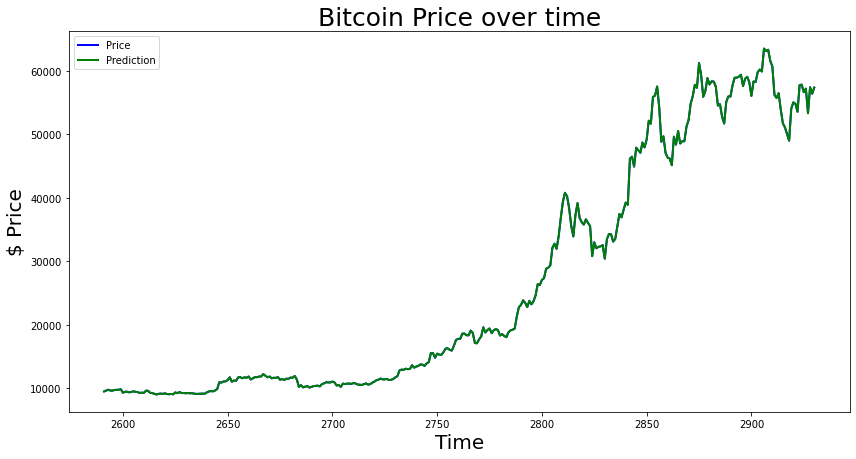

In [61]:
plt.figure(figsize = (14, 7))
plt.plot(df["Date"][-400:-60], df["Close"][-400:-60], color='blue', lw=2, label = "Price")
plt.plot(df["Date"][-400:-60], df['Close_Price_Prediction'][-400:-60], color='green', lw=2, label = "Prediction")
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)
plt.legend()

# DECISION TREE

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
from sklearn.tree import DecisionTreeRegressor 
df = pd.read_csv('C:\\Users\\Kemal\\Desktop\\BitcoinDataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Date delta'] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')

df.info()

df.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   SNo         2991 non-null   int64         
 1   Name        2991 non-null   object        
 2   Symbol      2991 non-null   object        
 3   Date        2991 non-null   datetime64[ns]
 4   High        2991 non-null   float64       
 5   Low         2991 non-null   float64       
 6   Open        2991 non-null   float64       
 7   Close       2991 non-null   float64       
 8   Volume      2991 non-null   float64       
 9   Marketcap   2991 non-null   float64       
 10  Date delta  2991 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 257.2+ KB


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Date delta
0,1,Bitcoin,BTC,2013-04-29 23:59:00,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,0.0
1,2,Bitcoin,BTC,2013-04-30 23:59:00,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,1.0
2,3,Bitcoin,BTC,2013-05-01 23:59:00,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,2.0
3,4,Bitcoin,BTC,2013-05-02 23:59:00,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,3.0
4,5,Bitcoin,BTC,2013-05-03 23:59:00,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,4.0
5,6,Bitcoin,BTC,2013-05-04 23:59:00,115.000000,92.500000,98.099998,112.500000,0.0,1.250317e+09,5.0
6,7,Bitcoin,BTC,2013-05-05 23:59:00,118.800003,107.142998,112.900002,115.910004,0.0,1.288693e+09,6.0


In [65]:
mse_dt = [0] * 10
mae_dt = [0] * 10
mape_dt = [0] * 10
max_dt = [0] * 10
r2_dt = [0] * 10

for i in range(10):
    # create a regressor object
    dtr1 = DecisionTreeRegressor(max_depth=50,
                             random_state=1)

    required_features = ['Date delta','Close']
    output_label = 'Close'

    X = df[required_features]
    y = df[output_label]
    x_train, x_test, y_train, y_test = train_test_split(
    df[required_features],
    df[output_label],
    test_size = 0.2
    )
    dtr1.fit(x_train, y_train)
    y_pred = dtr1.predict(x_test)

    mse_dt[i] =  mean_squared_error(y_pred,y_test)
    mae_dt[i] = mean_absolute_error(y_pred,y_test)
    mape_dt[i] = mean_absolute_percentage_error(y_pred,y_test)
    max_dt[i] = max_error(y_pred,y_test)
    r2_dt[i] = r2_score(y_pred,y_test)
    
print("MSE : ",mse_dt);
print("MAE : ",mae_dt);
print("MAPE : ",mape_dt);
print("MAX : ",max_dt);
print("R2 : ",r2_dt);


MSE :  [5334.397315096022, 7814.165153250929, 4361.651224473001, 5205.832439042174, 2821.01619920516, 8229.078970764442, 4207.309547168102, 4009.0127048035524, 5716.642455675339, 12205.407710303014]
MAE :  [19.272714976110155, 17.100726843939913, 18.02346247731217, 17.590028193739542, 15.100234494557526, 19.076135664223695, 18.284336583021716, 16.336743553171925, 19.472628894624286, 20.95273777811349]
MAPE :  [0.00219778049527863, 0.0025350717543939816, 0.0022997259783617517, 0.0022367304963336818, 0.0021780823945019906, 0.0023194456346734334, 0.001821868812085703, 0.001974457082833598, 0.002337166937064682, 0.002418774600339224]
MAX :  [731.8714, 1684.7631000000001, 928.840540000001, 881.761770000001, 623.0575600000011, 1772.247239999997, 651.8349600000001, 888.968369999995, 881.761770000001, 1536.9063300000053]
R2 :  [0.9999529431471974, 0.9999407790325588, 0.9999673140519642, 0.9999476874008669, 0.999973826313384, 0.9999362639144872, 0.9999705552003366, 0.9999675040436652, 0.9999536

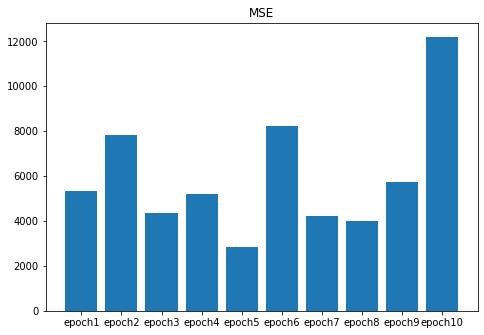

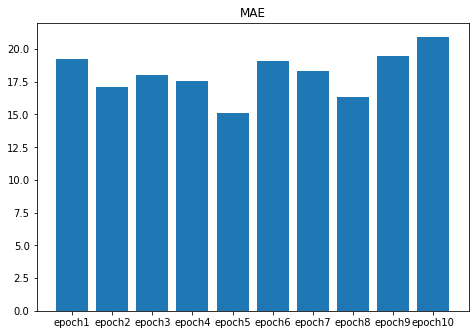

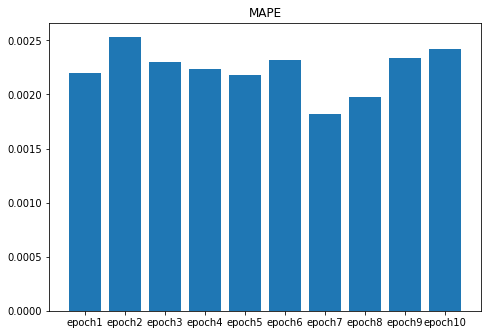

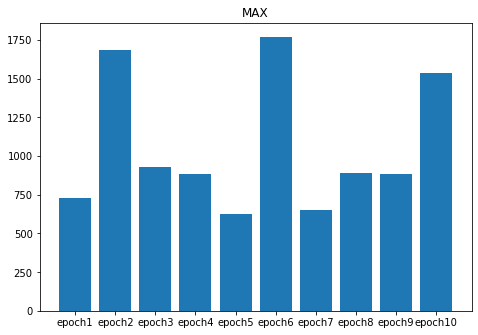

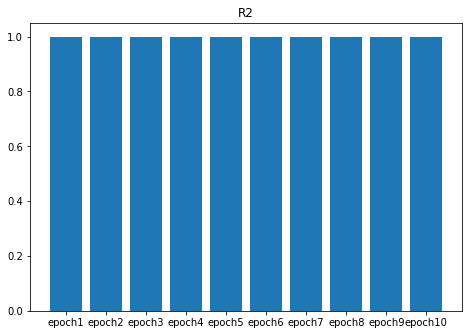

In [66]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
epoch = ['epoch1','epoch2','epoch3','epoch4','epoch5','epoch6','epoch7','epoch8','epoch9','epoch10',]
mses = [mse_dt[0],mse_dt[1],mse_dt[2],mse_dt[3],mse_dt[4],mse_dt[5],mse_dt[6],mse_dt[7],mse_dt[8],mse_dt[9]]
ax.bar(epoch,mses)
ax.set_title('MSE')
plt.show()

fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
maes = [mae_dt[0],mae_dt[1],mae_dt[2],mae_dt[3],mae_dt[4],mae_dt[5],mae_dt[6],mae_dt[7],mae_dt[8],mae_dt[9]]
ax2.bar(epoch,maes)
ax2.set_title('MAE')
plt.show()

fig3 = plt.figure()
ax3 = fig3.add_axes([0,0,1,1])
mapes = [mape_dt[0],mape_dt[1],mape_dt[2],mape_dt[3],mape_dt[4],mape_dt[5],mape_dt[6],mape_dt[7],mape_dt[8],mape_dt[9]]
ax3.bar(epoch,mapes)
ax3.set_title('MAPE')
plt.show()

fig4 = plt.figure()
ax4 = fig4.add_axes([0,0,1,1])
max = [max_dt[0],max_dt[1],max_dt[2],max_dt[3],max_dt[4],max_dt[5],max_dt[6],max_dt[7],max_dt[8],max_dt[9]]
ax4.bar(epoch,max)
ax4.set_title('MAX')
plt.show()

fig5 = plt.figure()
ax5 = fig5.add_axes([0,0,1,1])
r2 = [r2_dt[0],r2_dt[1],r2_dt[2],r2_dt[3],r2_dt[4],r2_dt[5],r2_dt[6],r2_dt[7],r2_dt[8],r2_dt[9]]
ax5.bar(epoch,r2)
ax5.set_title('R2')
plt.show()

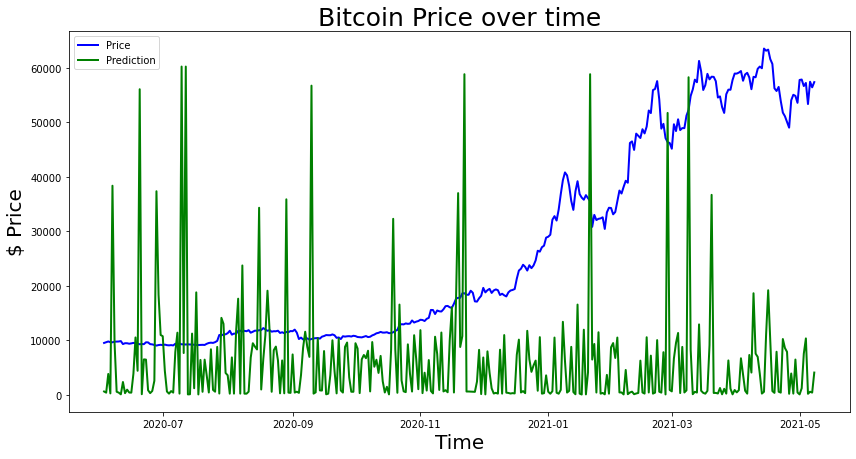

In [67]:
plt.figure(figsize = (14, 7))
plt.plot(df["Date"][-400:-60], df["Close"][-400:-60], color='blue', lw=2, label = "Price")
plt.plot(df["Date"][-400:-60], y_pred[-400:-60], color='green', lw=2, label = "Prediction")
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)
plt.legend()